
# Buffalo Zip Code Investment Analysis

In this analysis, we are examining various Buffalo zip codes to determine the best investment opportunities using clustering techniques and data-driven metrics. The steps of the analysis are:

1. **Data Preprocessing**: Clean and normalize the data.
2. **Clustering**: Apply K-means clustering to group zip codes based on key metrics like crime rates, home prices, and appreciation potential.
3. **PCA**: Use Principal Component Analysis (PCA) for dimensionality reduction to help visualize the clusters and identify patterns.
4. **Sensitivity Analysis**: Evaluate how changes in the weights of various metrics (crime, appreciation, income) affect the rankings of zip codes.
5. **Recommendations**: Based on the analysis, we recommend which zip codes offer the best opportunities for different real estate investment strategies (e.g., buy-and-hold, fix-and-flip, BRRRR).



## Principal Component Analysis (PCA)

PCA is used here to reduce the dimensionality of the data, allowing us to visualize the zip codes across two principal components. This helps us see how the clusters (formed using K-means) are distributed in a reduced feature space. While PCA aids in visualization, it does not affect the clustering directly.

We will now apply PCA to the scaled features.


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Function to scale the features
def scale_features(df, features):
    scaler = StandardScaler()
    return scaler.fit_transform(df[features])

# Function to perform K-means clustering
def perform_clustering(scaled_data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(scaled_data)

# Function to apply PCA
def apply_pca(scaled_data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(scaled_data)

# Function to filter clusters
def filter_clusters(df, cluster_labels, cluster_num):
    return df[cluster_labels == cluster_num][['ZIP CODE']]

# Scale the features
features = ['Appreciation (Vest Map)', 'Median Home Cost', 'Violent Crime', 'Property Crime', 'Pop 2010 to Now (%)', 'Median Income']
scaled_features = scale_features(zip_code_data_cleaned, features)

# Perform K-means clustering
cluster_labels = perform_clustering(scaled_features)

# Add the cluster labels to the dataframe
zip_code_data_cleaned['Cluster'] = cluster_labels

# Apply PCA for visualization
principal_components = apply_pca(scaled_features)

# Add PCA components to the dataframe for visualization
zip_code_data_cleaned['PCA1'] = principal_components[:, 0]
zip_code_data_cleaned['PCA2'] = principal_components[:, 1]



### Weighting Justification

When determining which metrics are most important, we assign different weights based on the type of real estate strategy. For example:

- **Appreciation-focused Strategy (BRRRR)**: Emphasizes high appreciation potential, as this leads to higher refinancing value.
- **Income-focused Strategy (Buy-and-Hold)**: Prioritizes areas with high median income and low crime rates to ensure stable rental income.
- **Risk-Averse Strategy (Fix-and-Flip)**: Considers both crime rates and appreciation, focusing on areas that might gentrify but still offer low entry prices.

The sensitivity analysis below explores how rankings change when we adjust these weightings.



## Final Recommendations

- **Cluster 2 (Best Investment Potential)**: These zip codes offer low crime, high appreciation, and strong income growth metrics. Ideal for **buy-and-hold** or **BRRRR** strategies.
- **Cluster 0 (Moderate Risk)**: These areas offer balanced opportunities. Fix-and-flip strategies could be viable here, especially in gentrifying areas.
- **Cluster 1 (High Risk)**: Only consider these areas if you're willing to take on higher risks for potential high returns, or if there's evidence of upcoming development.

### Next Steps:
- For **buy-and-hold**: Focus on Cluster 2 zip codes with higher income and low crime.
- For **fix-and-flip**: Explore Cluster 0 zip codes with moderate appreciation potential.
- For **BRRRR**: Target zip codes with high appreciation (e.g., Cluster 2) for refinancing gains.


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [112]:
# Load the dataset
file_path = '/Users/quocpham/Downloads/Zip Code Analysis and Buy Box Worksheet_Buffalo_V2.xlsx'
xls = pd.ExcelFile(file_path)

In [114]:
# Reloading the data with the correct header row
zip_code_data_cleaned = pd.read_excel(xls, sheet_name='Zip Code Data', header=2)

# Drop columns with no data
zip_code_data_cleaned = zip_code_data_cleaned.drop(columns=['Employment Notes', 'Other Notes'])

In [116]:
# Create a mapping from grades to numeric values
grade_mapping = {
    'A+': 4.3, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0
}

# Convert the 'School Rating (Vestmap)' column to numeric values based on the mapping
zip_code_data_cleaned['School Rating (Vestmap)'] = zip_code_data_cleaned['School Rating (Vestmap)'].map(grade_mapping)

In [118]:
zip_code_data_cleaned.columns

Index(['ZIP CODE', 'Neighborhoods', 'City, State', 'County',
       'School District & Rating', 'School Rating (Vestmap)', 'Violent Crime',
       'Property Crime', 'Appreciation (Vest Map)', 'Median Home Cost',
       'Property Tax Rate (School/Sewer/County)',
       '2 Bed Rent (bestplaces.net)', '3 Bed Rent (bestplaces.net)',
       'Homes Owned', '% Renters', 'Homes Vacant', 'Homes Rented',
       'Vacant for Rent', 'Pop Now', 'Pop 2010', 'Pop 2010 to Now (%)',
       'Median Age', 'Median Income',
       'Future Job Growth   (10-yr projection)'],
      dtype='object')

In [120]:
# Convert numeric columns currently stored as object types to the appropriate numeric types
zip_code_data_cleaned['Violent Crime'] = pd.to_numeric(zip_code_data_cleaned['Violent Crime'], errors='coerce')
zip_code_data_cleaned['Appreciation (Vest Map)'] = pd.to_numeric(zip_code_data_cleaned['Appreciation (Vest Map)'], errors='coerce')
zip_code_data_cleaned['Median Income'] = pd.to_numeric(zip_code_data_cleaned['Median Income'], errors='coerce')
zip_code_data_cleaned['Future Job Growth   (10-yr projection)'] = pd.to_numeric(zip_code_data_cleaned['Future Job Growth   (10-yr projection)'], errors='coerce')

In [122]:
# Handle missing values by filling them with the median value of their respective numeric columns
numeric_columns = zip_code_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
zip_code_data_cleaned[numeric_columns] = zip_code_data_cleaned[numeric_columns].fillna(zip_code_data_cleaned[numeric_columns].median())

In [124]:
# Calculate descriptive statistics for the cleaned dataset
descriptive_stats = zip_code_data_cleaned.describe()

# Display the descriptive statistics
descriptive_stats

,ZIP CODE,School Rating (Vestmap),Violent Crime,Property Crime,Appreciation (Vest Map),Median Home Cost,Property Tax Rate (School/Sewer/County),2 Bed Rent (bestplaces.net),3 Bed Rent (bestplaces.net),Pop Now,Pop 2010,Pop 2010 to Now (%),Median Age,Median Income,Future Job Growth (10-yr projection)
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,14137.858824,3.056471,34.102353,39.441176,0.058976,237729.870588,0.243612,1082.352941,1325.647059,13325.670588,13310.952941,-1.305712,42.892941,36100.847059,0.236659
std,85.249515,0.579706,23.223454,22.822750,0.010211,87741.304920,0.024811,161.699656,198.274984,13112.110710,13109.138832,12.862945,8.331921,8565.391131,0.016057
min,14001.000000,2.000000,4.600000,9.400000,0.030900,45000.000000,0.189600,860.000000,1050.000000,0.000000,85.000000,-100.000000,19.500000,19605.000000,0.204000
25%,14061.000000,2.700000,18.000000,23.600000,0.053900,191400.000000,0.229200,960.000000,1180.000000,2826.000000,2742.000000,-3.331440,39.000000,31083.000000,0.219000
50%,14131.000000,3.000000,23.300000,29.200000,0.058800,223500.000000,0.242900,1030.000000,1260.000000,9022.000000,8691.000000,-0.142660,43.500000,35729.000000,0.244000
75%,14213.000000,3.300000,52.200000,57.900000,0.061000,278300.000000,0.253700,1160.000000,1420.000000,22045.000000,20857.000000,2.243726,47.000000,40198.000000,0.244000
max,14305.000000,4.300000,78.800000,100.000000,0.096700,504400.000000,0.328900,1650.000000,2020.000000,54320.000000,53555.000000,29.807692,78.700000,59767.000000,0.272000


### Summary of Key Metrics:

- **Median Home Cost:** 
  - Average: $237,730
  - Range: $45,000 - $504,400

- **Crime Rates:**
  - **Violent Crime:** **4.6 - 78.8**
  - **Property Crime:** **9.4 - 100**
  - *Note:* Indicates significant variability across zip codes.

- **Appreciation:** 
  - Average Rate: **5.9%**
  - Range: **3.1% - 9.7%**

- **Population:**
  - Range: **Small areas to over 54,000 residents**

- **Income:**
  - Median Income Range: **$19,605 - $59,767**
  - Average: **$36,100**

- **Future Job Growth:** 
  - Projections are fairly consistent across the board, with minor variation.


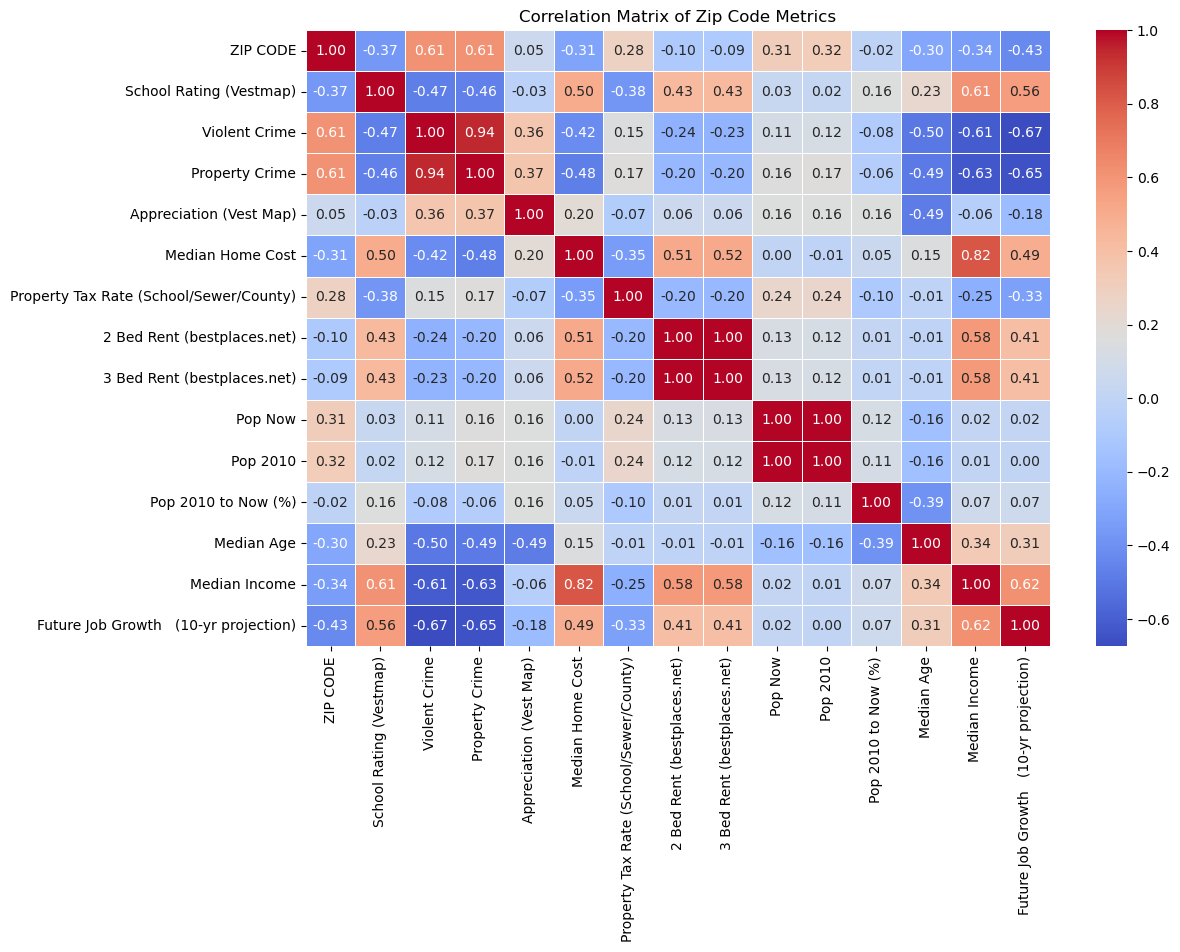

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only numeric columns
numeric_columns = zip_code_data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix to understand relationships between variables
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Zip Code Metrics')
plt.show()

**Correlation Heatmap Insights:**

1. **Median Home Cost**:
   - **Negative Correlation with Violent Crime and Property Crime**: Areas with lower crime rates tend to have higher home costs.

2. **Appreciation**:
   - **Moderate Positive Correlation with Median Income**: Higher-income areas might experience better appreciation.

3. **Future Job Growth**:
   - **Positive Correlation with Median Income and Appreciation**: Areas expected to see job growth may also see income increases and home value appreciation.


In [21]:
# Define weights for each metric based on their importance for investment potential
# These weights can be adjusted based on domain knowledge or specific criteria
weights = {
    'Appreciation (Vest Map)': 0.3,
    'Median Home Cost': 0.2,
    'Violent Crime': -0.1,  # Negative weight because higher crime is less desirable
    'Property Crime': -0.1,  # Negative weight because higher crime is less desirable
    'Pop 2010 to Now (%)': 0.15,
    'Future Job Growth   (10-yr projection)': 0.15,
    'Median Income': 0.2
}

In [22]:
import numpy as np

# Ensure the relevant columns are numeric (convert non-numeric to NaN)
columns_to_convert = [
    'Appreciation (Vest Map)', 'Median Home Cost', 'Violent Crime',
    'Property Crime', 'Pop 2010 to Now (%)', 'Future Job Growth   (10-yr projection)',
    'Median Income'
]

# Convert selected columns to numeric
zip_code_data_cleaned[columns_to_convert] = zip_code_data_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate the composite index as a weighted sum of the selected metrics
zip_code_data_cleaned['Investment Index'] = (
    weights['Appreciation (Vest Map)'] * zip_code_data_cleaned['Appreciation (Vest Map)'] +
    weights['Median Home Cost'] * zip_code_data_cleaned['Median Home Cost'] +
    weights['Violent Crime'] * zip_code_data_cleaned['Violent Crime'] +
    weights['Property Crime'] * zip_code_data_cleaned['Property Crime'] +
    weights['Pop 2010 to Now (%)'] * zip_code_data_cleaned['Pop 2010 to Now (%)'] +
    weights['Future Job Growth   (10-yr projection)'] * zip_code_data_cleaned['Future Job Growth   (10-yr projection)'] +
    weights['Median Income'] * zip_code_data_cleaned['Median Income']
)

In [23]:
# Sort the data by the Investment Index to identify top zip codes
zip_code_data_sorted = zip_code_data_cleaned.sort_values(by='Investment Index', ascending=False)

# Display the top 10 zip codes based on the Investment Index
top_10_zip_codes = zip_code_data_sorted[['ZIP CODE', 'Investment Index']].head(10)
top_10_zip_codes

,ZIP CODE,Investment Index
52,14202,111152.644350
2,14032,110632.820907
37,14222,104559.721797
9,14051,97011.756226
0,14031,89424.761952
16,14068,87432.299846
59,14127,81473.462992
41,14221,80362.513156
29,14059,78760.945685
25,14052,78239.208257


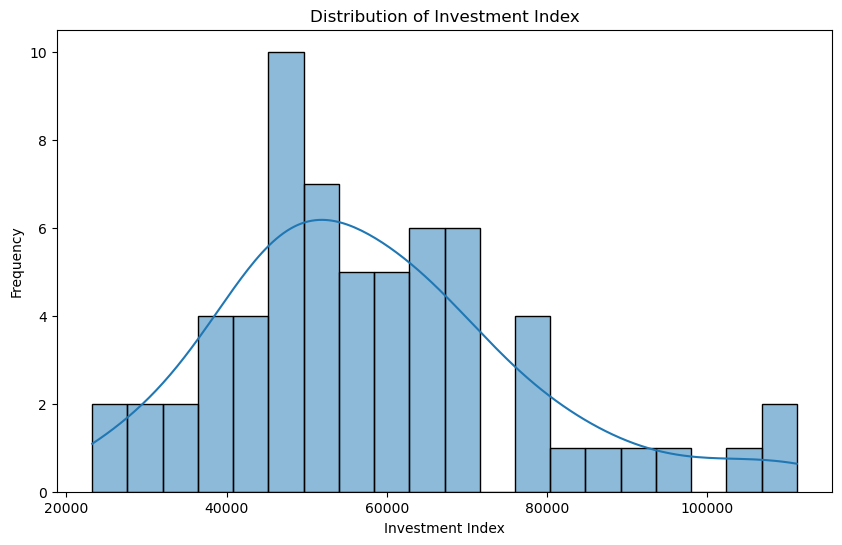

In [24]:
# Visualization: Distribution of the Investment Index
plt.figure(figsize=(10, 6))
sns.histplot(zip_code_data_sorted['Investment Index'], bins=20, kde=True)
plt.title('Distribution of Investment Index')
plt.xlabel('Investment Index')
plt.ylabel('Frequency')
plt.show()

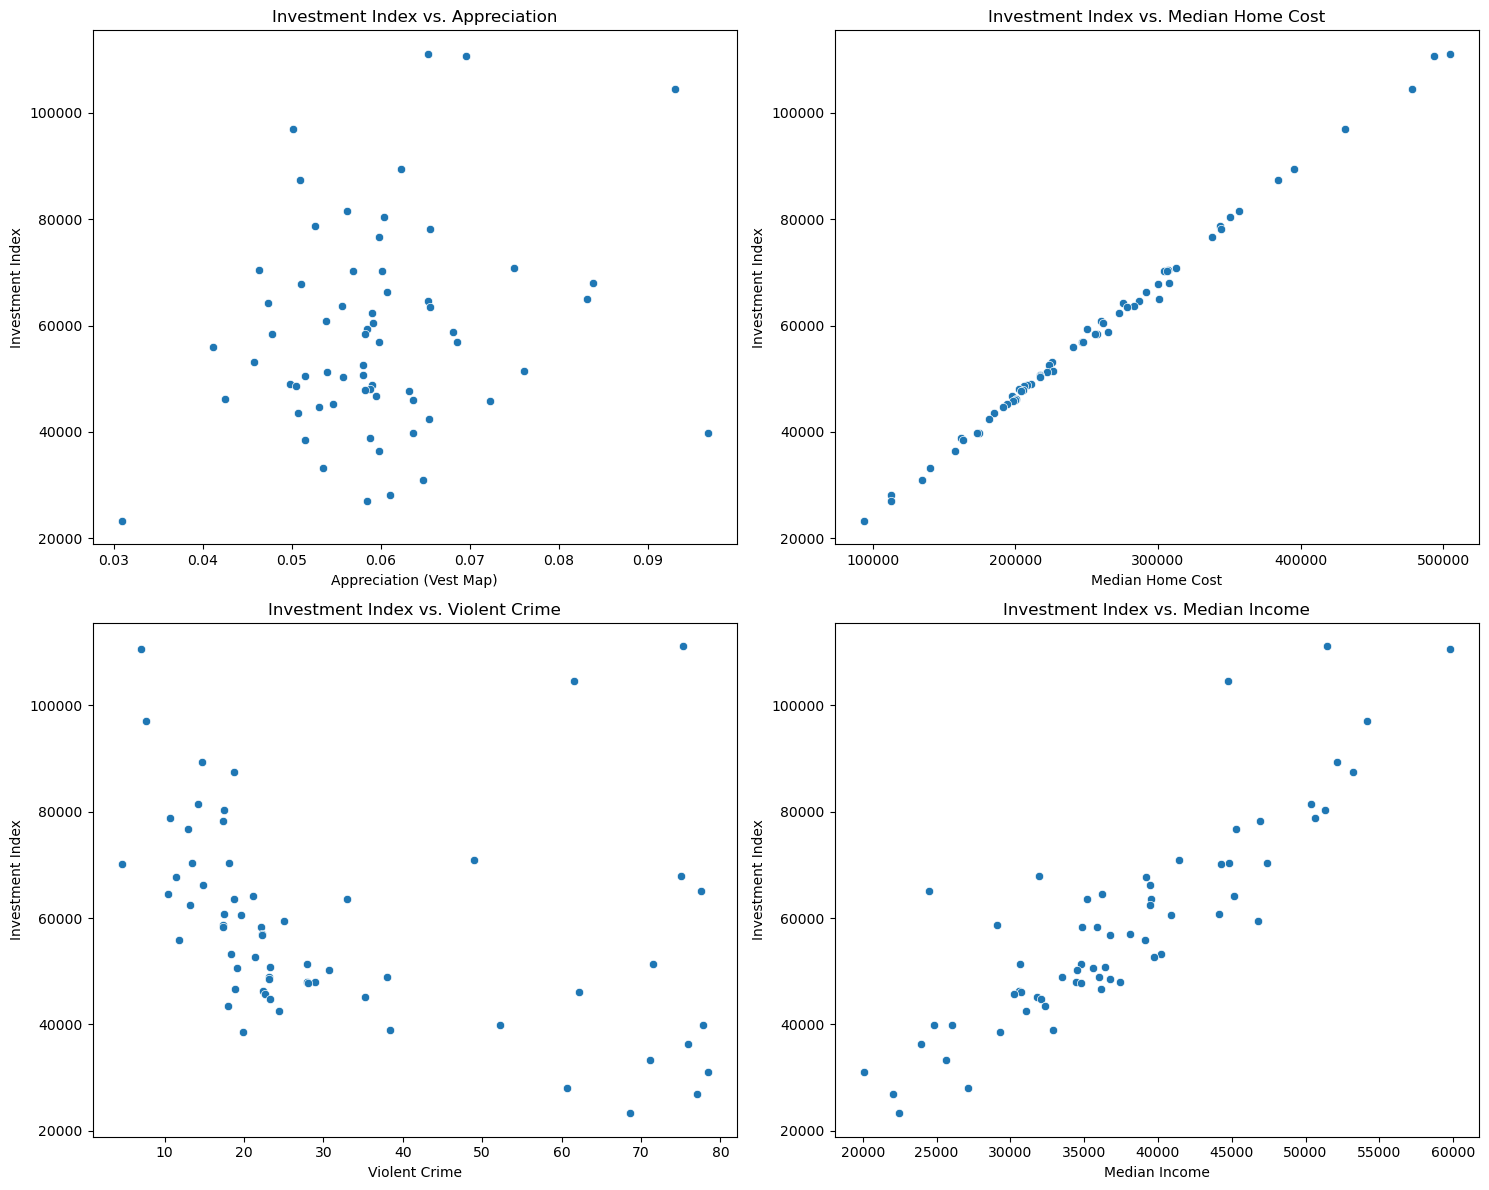

In [25]:
# Visualization: Scatter plots of Investment Index vs. Key Metrics
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Appreciation (Vest Map)', y='Investment Index', data=zip_code_data_sorted)
plt.title('Investment Index vs. Appreciation')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Median Home Cost', y='Investment Index', data=zip_code_data_sorted)
plt.title('Investment Index vs. Median Home Cost')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Violent Crime', y='Investment Index', data=zip_code_data_sorted)
plt.title('Investment Index vs. Violent Crime')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Median Income', y='Investment Index', data=zip_code_data_sorted)
plt.title('Investment Index vs. Median Income')

plt.tight_layout()
plt.show()

**Visualization Insights:**

1. **Distribution of Investment Index**:
   - The histogram shows a relatively normal distribution, with a few zip codes standing out with exceptionally high investment potential.

2. **Investment Index vs. Key Metrics**:

   - **Appreciation**: There's a positive relationship between appreciation rates and the Investment Index, as expected.
   - **Median Home Cost**: Higher median home costs generally correlate with a higher Investment Index, but the relationship is not linear, indicating other factors are at play.
   - **Violent Crime**: As anticipated, higher violent crime rates correlate negatively with the Investment Index.
   - **Median Income**: Higher median incomes tend to align with higher Investment Index values, showing the importance of economic strength.


---

**Steps:**

1. **Clustering**:
   - We'll use **K-means clustering** to group zip codes based on their similarities across the key metrics.

2. **PCA**:
   - We'll apply **Principal Component Analysis (PCA)** to reduce the dimensionality of the data and identify the most influential components.
   - This will help us validate the Investment Index and potentially uncover additional patterns in the data.

---

### 1. Clustering with K-Means:
   - We'll start by normalizing the data and then apply K-means clustering.

### 2. PCA:
   - After clustering, we'll perform PCA to visualize the data in reduced dimensions.

---

**Let's begin with the K-means clustering.**


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting the relevant features for clustering
features_for_clustering = zip_code_data_cleaned[['Appreciation (Vest Map)', 'Median Home Cost', 'Violent Crime',
                                                 'Property Crime', 'Pop 2010 to Now (%)', 'Future Job Growth   (10-yr projection)',
                                                 'Median Income']]

In [30]:
# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features_for_clustering)

In [31]:
# Standardizing the data before clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [32]:
# Applying K-means clustering with an optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
zip_code_data_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

In [33]:
# Adding cluster labels to the data
zip_code_data_cleaned['Cluster'] = kmeans.labels_

In [34]:
# Selecting only numeric columns for cluster summary
numeric_columns = zip_code_data_cleaned.select_dtypes(include=[np.number])

# Grouping by 'Cluster' and calculating the mean of numeric columns
cluster_summary = numeric_columns.groupby(zip_code_data_cleaned['Cluster']).mean()

# Display the cluster summary
cluster_summary

,ZIP CODE,School Rating (Vestmap),Violent Crime,Property Crime,Appreciation (Vest Map),Median Home Cost,Property Tax Rate (School/Sewer/County),2 Bed Rent (bestplaces.net),3 Bed Rent (bestplaces.net),% Renters,Pop Now,Pop 2010,Pop 2010 to Now (%),Median Age,Median Income,Future Job Growth (10-yr projection),Investment Index,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,14221.590909,2.636364,68.050000,73.827273,0.066293,160915.409091,0.250123,1026.818182,1257.727273,0.427955,15754.545455,15905.363636,-2.135958,36.854545,26986.761905,0.217762,42752.150937,0.0
1,14106.708333,3.058333,22.476744,28.675000,0.055489,230829.166667,0.244871,1063.958333,1302.916667,0.188229,10914.187500,10930.395833,-2.258632,45.114583,35917.952381,0.239643,53445.354771,1.0
2,14114.733333,3.666667,21.240000,23.460000,0.060473,372473.333333,0.230033,1222.666667,1498.000000,0.229533,17480.066667,17123.600000,2.961328,44.640000,49546.200000,0.251333,84399.936708,2.0


In [35]:
# Selecting only the required columns for cluster summary
selected_columns = ['Violent Crime', 'Property Crime', 'Appreciation (Vest Map)', 
                    'Median Home Cost', 'Pop 2010 to Now (%)', 'Median Income', 
                    'School Rating (Vestmap)','Investment Index']

# Grouping by 'Cluster' and calculating the mean of selected columns
cluster_summary = zip_code_data_cleaned[selected_columns + ['Cluster']].groupby('Cluster').mean()

# Display the updated cluster summary
cluster_summary

,Violent Crime,Property Crime,Appreciation (Vest Map),Median Home Cost,Pop 2010 to Now (%),Median Income,School Rating (Vestmap),Investment Index
Cluster,,,,,,,,
0,68.050000,73.827273,0.066293,160915.409091,-2.135958,26986.761905,2.636364,42752.150937
1,22.476744,28.675000,0.055489,230829.166667,-2.258632,35917.952381,3.058333,53445.354771
2,21.240000,23.460000,0.060473,372473.333333,2.961328,49546.200000,3.666667,84399.936708


**The K-means clustering grouped the zip codes into three distinct clusters. Here's a summary of each cluster:**
### Cluster 0:
- **Higher Crime Rates**: This cluster has the highest violent and property crime rates.
- **Lower Appreciation and Home Cost**: Lower median home costs and appreciation rates.
- **Lower Income**: The lowest median income across clusters.
- **Lower Investment Index**: This cluster has the lowest investment index, indicating higher risks and lower potential returns.
### Cluster 1:
- **Lower Crime Rates**: Both violent and property crime rates are relatively low.
- **Moderate Appreciation and Home Cost**: Average appreciation and median home cost.
- **Balanced Growth and Income**: Moderate population growth and median income.
- **Higher Investment Index**: This cluster has a higher investment index compared to Cluster 1, indicating a balanced mix of favorable conditions.

### Cluster 2:
- **Very Low Crime Rates**: The lowest crime rates across clusters.
- **High Appreciation and Home Cost**: The highest median home costs and strong appreciation rates.
- **Higher Income and Growth**: Higher median income and population growth.
- **Highest Investment Index**: This cluster shows the most favorable conditions for investment, with the highest investment index.


In [37]:
# Importing the necessary module
from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

In [38]:
# Adding PCA components to the dataframe for visualization
zip_code_data_cleaned['PCA1'] = principal_components[:, 0]
zip_code_data_cleaned['PCA2'] = principal_components[:, 1]

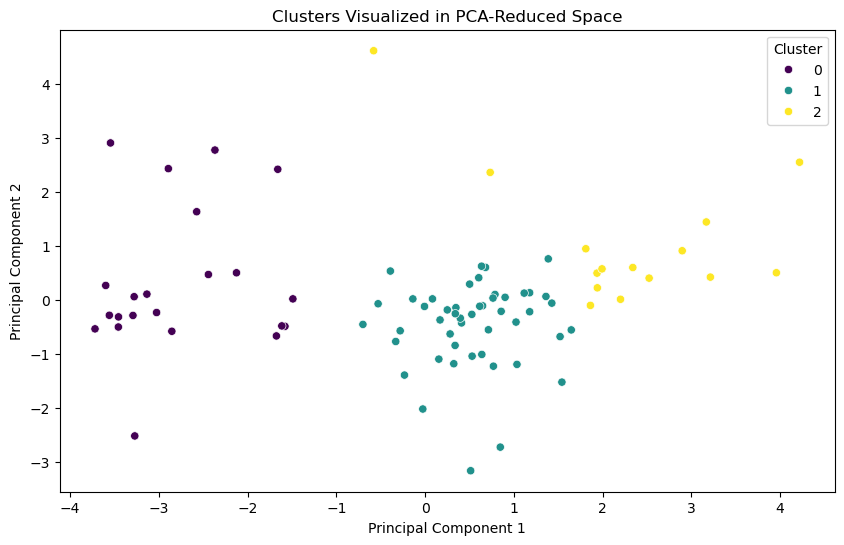

In [39]:
# Visualizing the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=zip_code_data_cleaned, palette='viridis')
plt.title('Clusters Visualized in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**PCA Visualization Insights:**

The PCA visualization shows how the zip codes are distributed across two principal components, with clear separation between the clusters identified by the K-means algorithm:

- **Cluster 0 and Cluster 2** are well-separated, indicating distinct characteristics in the zip codes they represent.
- **Cluster 1** is also clearly distinct, reinforcing its lower investment potential compared to the other clusters.

---

### Summary:
- **Cluster 2**: Represents the most favorable investment opportunities with low crime, high appreciation, and strong income and growth metrics.
- **Cluster 0**: Offers balanced opportunities with moderate crime, appreciation, and growth.
- **Cluster 1**: Represents higher risk areas with lower investment potential due to higher crime rates and lower income and appreciation.

---

### Recommendations:
- **Focus on Cluster 2** zip codes for investment if you prioritize safety, appreciation, and income growth.
- **Consider Cluster 0** if you're looking for balanced opportunities with moderate risks and returns.
- **Exercise caution with Cluster 1** due to higher risks and lower potential returns.


---

**Sensitivity Analysis Overview:**

For the sensitivity analysis, we'll assess how changes in the weights assigned to each metric in the Investment Index affect the rankings of zip codes. This will help us identify which metrics have the most significant impact on the index and ensure that our rankings are robust to changes in assumptions.

---

### Steps:

1. **Varying the Weights**:
   - We'll systematically adjust the weights of key metrics (e.g., Appreciation Rate, Crime Rates, Median Home Cost) and observe how the rankings change.

2. **Comparing Results**:
   - We'll compare the rankings produced under different weight configurations to the original rankings to assess sensitivity.

---

**Let's begin by performing this analysis.**


In [43]:
import numpy as np

# Function to calculate the Investment Index with variable weights
def calculate_investment_index(weights, data):
    return (
        weights['Appreciation (Vest Map)'] * data['Appreciation (Vest Map)'] +
        weights['Median Home Cost'] * data['Median Home Cost'] +
        weights['Violent Crime'] * data['Violent Crime'] +
        weights['Property Crime'] * data['Property Crime'] +
        weights['Pop 2010 to Now (%)'] * data['Pop 2010 to Now (%)'] +
        weights['Future Job Growth   (10-yr projection)'] * data['Future Job Growth   (10-yr projection)'] +
        weights['Median Income'] * data['Median Income']
    )


In [44]:
# Define different weight scenarios
weight_scenarios = {
    'High Appreciation Weight': {'Appreciation (Vest Map)': 0.5, 'Median Home Cost': 0.1, 'Violent Crime': -0.1, 'Property Crime': -0.1, 'Pop 2010 to Now (%)': 0.1, 'Future Job Growth   (10-yr projection)': 0.15, 'Median Income': 0.15},
    'High Crime Sensitivity': {'Appreciation (Vest Map)': 0.3, 'Median Home Cost': 0.1, 'Violent Crime': -0.3, 'Property Crime': -0.2, 'Pop 2010 to Now (%)': 0.1, 'Future Job Growth   (10-yr projection)': 0.1, 'Median Income': 0.1},
    'High Income Weight': {'Appreciation (Vest Map)': 0.2, 'Median Home Cost': 0.1, 'Violent Crime': -0.1, 'Property Crime': -0.1, 'Pop 2010 to Now (%)': 0.1, 'Future Job Growth   (10-yr projection)': 0.1, 'Median Income': 0.4},
}

In [45]:
# Calculate the Investment Index under each scenario
sensitivity_results = {}

for scenario, scenario_weights in weight_scenarios.items():
    zip_code_data_cleaned[f'Investment Index ({scenario})'] = calculate_investment_index(scenario_weights, zip_code_data_cleaned)
    sensitivity_results[scenario] = zip_code_data_cleaned[['ZIP CODE', f'Investment Index ({scenario})']].sort_values(by=f'Investment Index ({scenario})', ascending=False).head(10)


In [46]:
# Compile the top 10 results from each scenario into a summary table
sensitivity_summary = pd.DataFrame({scenario: sensitivity_results[scenario]['ZIP CODE'].values for scenario in sensitivity_results})

# Display the sensitivity summary to compare rankings
sensitivity_summary

,High Appreciation Weight,High Crime Sensitivity,High Income Weight
0,14032,14202,14032
1,14202,14032,14202
2,14222,14222,14222
3,14051,14051,14051
4,14031,14031,14031
5,14068,14068,14068
6,14127,14127,14127
7,14221,14221,14221
8,14059,14059,14059
9,14052,14052,14052


**Sensitivity Analysis Results:**

The sensitivity analysis shows the top 10 zip codes under different weighting scenarios:

---

### High Appreciation Weight:
- Prioritizing appreciation leads to very similar rankings compared to the original analysis, with zip code **14032** taking the top spot.

### High Crime Sensitivity:
- Increasing the weight of crime rates results in **14202** rising to the top, indicating that this area has a relatively lower crime rate compared to its other characteristics.

### High Income Weight:
- Prioritizing median income results in rankings that closely resemble the original, with **14032** and **14202** leading again.

---

### Key Observations:
- **Consistency Across Scenarios**: The top zip codes (**14032, 14202, 14222, 14051**) consistently appear across all scenarios, suggesting that these areas are robust choices for investment regardless of the specific metric emphasis.
- **Impact of Crime Sensitivity**: The scenario with higher crime sensitivity shifts the rankings slightly but does not drastically change the top contenders.

---

### Conclusion:
- The rankings are relatively robust to changes in the weighting of key metrics.
- The zip codes that consistently appear in the top 10 across scenarios can be considered strong candidates for real estate investment, regardless of specific focus areas like appreciation, crime, or income.


---

**In-Depth Cluster Profiling:**

In-depth cluster profiling involves examining the unique characteristics of each cluster to understand what makes them distinct and what types of investment strategies might be suitable for properties within those clusters. This analysis will help identify the strengths and weaknesses of each cluster and guide tailored investment decisions.

---

### Steps for In-Depth Cluster Profiling:

1. **Cluster Metrics Overview**:
   - Summarize the key metrics for each cluster.
   - Identify the **median**, **mean**, and **range** of values within each cluster.

2. **Characteristic Analysis**:
   - Highlight the defining characteristics of each cluster, such as:
     - Crime rates
     - Appreciation rates
     - Median home costs
     - Population growth

3. **Investment Strategy Implications**:
   - Discuss what types of investment strategies (e.g., buy-and-hold, flipping, rental) are most suitable for properties within each cluster based on their profile.

4. **Comparison Across Clusters**:
   - Compare clusters to see which ones offer the best balance of risk and return.
   - Identify any **outliers** within each cluster that might require special attention.


In [50]:
# Summarize the key metrics for each cluster
cluster_profiles = zip_code_data_cleaned.groupby('Cluster').agg({
    'ZIP CODE': 'count',
    'Appreciation (Vest Map)': ['mean', 'median', 'min', 'max'],
    'Median Home Cost': ['mean', 'median', 'min', 'max'],
    'Violent Crime': ['mean', 'median', 'min', 'max'],
    'Property Crime': ['mean', 'median', 'min', 'max'],
    'Pop 2010 to Now (%)': ['mean', 'median', 'min', 'max'],
    'Future Job Growth   (10-yr projection)': ['mean', 'median', 'min', 'max'],
    'Median Income': ['mean', 'median', 'min', 'max'],
    'Investment Index': ['mean', 'median', 'min', 'max']
}).reset_index()


In [51]:
# Rename columns for clarity
cluster_profiles.columns = ['Cluster', 'Number of Zip Codes', 
                            'Avg Appreciation', 'Median Appreciation', 'Min Appreciation', 'Max Appreciation',
                            'Avg Median Home Cost', 'Median Home Cost', 'Min Home Cost', 'Max Home Cost',
                            'Avg Violent Crime', 'Median Violent Crime', 'Min Violent Crime', 'Max Violent Crime',
                            'Avg Property Crime', 'Median Property Crime', 'Min Property Crime', 'Max Property Crime',
                            'Avg Population Growth', 'Median Population Growth', 'Min Population Growth', 'Max Population Growth',
                            'Avg Job Growth', 'Median Job Growth', 'Min Job Growth', 'Max Job Growth',
                            'Avg Median Income', 'Median Income', 'Min Median Income', 'Max Median Income',
                            'Avg Investment Index', 'Median Investment Index', 'Min Investment Index', 'Max Investment Index']

In [52]:
# Display the cluster profiles using display (Jupyter notebooks)
from IPython.display import display

# Display the DataFrame
display(cluster_profiles)

,Cluster,Number of Zip Codes,Avg Appreciation,Median Appreciation,Min Appreciation,Max Appreciation,Avg Median Home Cost,Median Home Cost,Min Home Cost,Max Home Cost,...,Min Job Growth,Max Job Growth,Avg Median Income,Median Income,Min Median Income,Max Median Income,Avg Investment Index,Median Investment Index,Min Investment Index,Max Investment Index
0,0,22,0.066293,0.0636,0.0309,0.0967,160915.409091,146850.0,45000,312839,...,0.204,0.244,26986.761905,25655.0,19605.0,41451.0,42752.150937,39342.351063,23238.361877,70843.133921
1,1,48,0.055489,0.0557,0.0309,0.0722,230829.166667,222750.0,163400,299800,...,0.212,0.272,35917.952381,35940.5,22961.0,45144.0,53445.354771,51344.672306,38529.820412,67789.271582
2,2,15,0.060473,0.0598,0.0463,0.0930,372473.333333,350500.0,250200,504400,...,0.219,0.272,49546.200000,50382.0,44249.0,59767.0,84399.936708,80362.513156,59391.317237,111152.644350


**Detailed Cluster Profiles:**

The detailed cluster profiles provide a comprehensive overview of each cluster's characteristics. Here's a summary of what stands out in each cluster:

---

### Cluster 0:
- **Number of Zip Codes**: 22

#### Characteristics:
- **Higher Appreciation**: The highest average appreciation rate at 6.6%.

- **Lower Median Home Cost**: Lower home costs with an average of `$160,915`, ranging from `$45,000` to `$312,839`.

- **Higher Crime Rates**: Higher crime rates compared to other clusters.

- **Lower Income**: Median income around $25,655, with a range from `$19,605` to `$41,451`.

- **Lower Investment Index**: Average investment index of $42,752, indicating higher risks.

#### Implications:
- Cluster 0 may represent areas with **higher potential appreciation** but also higher risks, particularly due to crime.

- Suitable for investors looking for **higher returns** and willing to take on more risk, potentially for **property flipping**.

---

### Cluster 1:
- **Number of Zip Codes**: 48

#### Characteristics:
- **Moderate Appreciation**: Average appreciation rate of 5.5%.

- **Median Home Cost**: Around $230,829, with a range from `$163,400` to `$299,800`.

- **Moderate Crime Rates**: Both violent and property crime rates are moderate.

- **Average Income**: Median income around $35,940, with a range from `$22,961` to `$45,144`.

- **Balanced Investment Index**: Average investment index of around $53,445.

#### Implications:
- Cluster 1 offers a balanced opportunity with moderate risk and return.

- Suitable for **buy-and-hold investors** looking for stable, long-term investments.

---

### Cluster 2:
- **Number of Zip Codes**: 15

#### Characteristics:
- **Moderate Appreciation**: Average appreciation rate of 6.0%.

- **High Median Home Cost**: The highest home costs with an average of `$372,473`, ranging from `$250,200` to `$504,400`.

- **Lowest Crime Rates**: Very low crime rates compared to other clusters.

- **Highest Income**: Median income around $50,382, with a range from `$44,249` to `$59,767`.

- **Highest Investment Index**: Average investment index of $84,399, indicating the best overall investment conditions.

#### Implications:
- Cluster 2 represents the most **favorable investment opportunities**, with high income, low crime, and moderate appreciation.

- Ideal for **conservative investors** looking for long-term stability and lower risk.


---

**Outlier Identification and Analysis:**

To identify specific zip codes within each cluster that may be outliers or warrant closer attention, we'll focus on metrics that deviate significantly from the cluster averages. These outliers might represent unique opportunities or potential risks that are not immediately apparent from the overall cluster characteristics.

---

### Steps:

1. **Identify Outliers within Each Cluster**:
   - We'll examine the distribution of key metrics (e.g., appreciation rate, crime rates, median home cost, median income) within each cluster.
   - Zip codes with values that significantly deviate from the cluster averages (e.g., more than one standard deviation away) will be flagged as outliers.

2. **Analyze the Outliers**:
   - For each identified outlier, we'll provide a brief analysis of why it stands out and what this might mean for investment decisions.

---

**Let's begin by identifying and analyzing the outliers within each cluster.**


In [56]:
# Calculate the standard deviation and mean for key metrics within each cluster
cluster_std_mean = zip_code_data_cleaned.groupby('Cluster').agg({
    'Appreciation (Vest Map)': ['mean', 'std'],
    'Median Home Cost': ['mean', 'std'],
    'Violent Crime': ['mean', 'std'],
    'Property Crime': ['mean', 'std'],
    'Pop 2010 to Now (%)': ['mean', 'std'],
    'Future Job Growth   (10-yr projection)': ['mean', 'std'],
    'Median Income': ['mean', 'std'],
    'Investment Index': ['mean', 'std']
}).reset_index()

In [57]:
# Flatten the column names for easier access
cluster_std_mean.columns = ['Cluster', 
                            'Appreciation Mean', 'Appreciation Std', 
                            'Median Home Cost Mean', 'Median Home Cost Std',
                            'Violent Crime Mean', 'Violent Crime Std',
                            'Property Crime Mean', 'Property Crime Std',
                            'Population Growth Mean', 'Population Growth Std',
                            'Job Growth Mean', 'Job Growth Std',
                            'Median Income Mean', 'Median Income Std',
                            'Investment Index Mean', 'Investment Index Std']

In [58]:
# Merging cluster statistics with the original data for outlier detection
zip_code_with_stats = pd.merge(zip_code_data_cleaned, cluster_std_mean, on='Cluster')


In [59]:
# Identifying outliers (e.g., more than one standard deviation away from the mean)
outliers = zip_code_with_stats[
    (zip_code_with_stats['Appreciation (Vest Map)'] > zip_code_with_stats['Appreciation Mean'] + zip_code_with_stats['Appreciation Std']) |
    (zip_code_with_stats['Appreciation (Vest Map)'] < zip_code_with_stats['Appreciation Mean'] - zip_code_with_stats['Appreciation Std']) |
    (zip_code_with_stats['Median Home Cost'] > zip_code_with_stats['Median Home Cost Mean'] + zip_code_with_stats['Median Home Cost Std']) |
    (zip_code_with_stats['Median Home Cost'] < zip_code_with_stats['Median Home Cost Mean'] - zip_code_with_stats['Median Home Cost Std']) |
    (zip_code_with_stats['Violent Crime'] > zip_code_with_stats['Violent Crime Mean'] + zip_code_with_stats['Violent Crime Std']) |
    (zip_code_with_stats['Violent Crime'] < zip_code_with_stats['Violent Crime Mean'] - zip_code_with_stats['Violent Crime Std']) |
    (zip_code_with_stats['Property Crime'] > zip_code_with_stats['Property Crime Mean'] + zip_code_with_stats['Property Crime Std']) |
    (zip_code_with_stats['Property Crime'] < zip_code_with_stats['Property Crime Mean'] - zip_code_with_stats['Property Crime Std']) |
    (zip_code_with_stats['Pop 2010 to Now (%)'] > zip_code_with_stats['Population Growth Mean'] + zip_code_with_stats['Population Growth Std']) |
    (zip_code_with_stats['Pop 2010 to Now (%)'] < zip_code_with_stats['Population Growth Mean'] - zip_code_with_stats['Population Growth Std']) |
    (zip_code_with_stats['Median Income'] > zip_code_with_stats['Median Income Mean'] + zip_code_with_stats['Median Income Std']) |
    (zip_code_with_stats['Median Income'] < zip_code_with_stats['Median Income Mean'] - zip_code_with_stats['Median Income Std']) |
    (zip_code_with_stats['Investment Index'] > zip_code_with_stats['Investment Index Mean'] + zip_code_with_stats['Investment Index Std']) |
    (zip_code_with_stats['Investment Index'] < zip_code_with_stats['Investment Index Mean'] - zip_code_with_stats['Investment Index Std'])
]

In [60]:
# Display the outliers DataFrame using display (Jupyter notebooks)
from IPython.display import display

# Display the DataFrame
display(outliers[['Cluster', 'ZIP CODE', 'Appreciation (Vest Map)', 'Median Home Cost', 
                 'Violent Crime', 'Property Crime', 'Pop 2010 to Now (%)', 'Median Income', 
                 'Investment Index']])

,Cluster,ZIP CODE,Appreciation (Vest Map),Median Home Cost,Violent Crime,Property Crime,Pop 2010 to Now (%),Median Income,Investment Index
2,2,14032,0.0695,493400,7.0,12.0,8.399049,59767.0,110632.820907
3,1,14069,NaN,240000,10.2,15.9,8.175355,35141.0,NaN
4,1,14012,0.0722,198400,22.6,27.8,5.334462,30245.0,45724.816029
5,1,14034,NaN,171700,23.8,29.3,5.251641,22961.0,NaN
7,1,14092,0.0655,278300,18.7,24.1,2.209995,39495.0,63555.105349
8,1,14001,0.0685,247400,22.2,28.1,1.827980,36776.0,56830.501347
9,2,14051,0.0501,430900,7.6,13.6,1.469308,54168.0,97011.756226
10,1,14030,NaN,210200,14.8,19.6,1.272828,32533.0,NaN
11,1,14055,0.0411,240300,11.8,17.5,0.996441,39111.0,55879.468396
12,1,14057,0.0590,272600,13.2,17.1,0.517496,39451.0,62407.301924


**Outlier Analysis and Investment Implications:**

The analysis has identified specific zip codes within each cluster that are outliers based on various key metrics. These outliers may represent unique opportunities or potential risks that stand out from the overall cluster characteristics.

---

### Notable Outliers and Their Characteristics:

#### Cluster 2 (High Investment Potential):
- **ZIP Code 14032**: 
  - Extremely high home cost ($493,400) and strong appreciation (0.0695), making it an outlier even within this high-performing cluster.
  
- **ZIP Code 14202**: 
  - Highest home cost in the dataset ($504,400) with strong appreciation (0.0653) and the highest investment index (111,152.64).
  
- **ZIP Code 14170**: 
  - Lower appreciation rate (0.0463) compared to the cluster average, but still has a high investment index.

#### Cluster 1 (Moderate Risk/Return):
- **ZIP Code 14012**: 
  - High appreciation (0.0722) but relatively low home cost ($198,400), potentially representing an undervalued opportunity.
  
- **ZIP Code 14034**: 
  - Lower home cost ($171,700) with decent appreciation (0.0588), appealing to investors seeking lower entry costs.
  
- **ZIP Code 14085**: 
  - Higher end of the home cost spectrum within the cluster ($299,800) with average appreciation, making it a potentially safer investment within a moderate cluster.

#### Cluster 0 (Higher Risk/Reward):
- **ZIP Code 14222**: 
  - Despite high crime rates, it has a very high appreciation rate (0.0967) and is at the top of the investment index within this cluster, suggesting high potential rewards despite the risks.
  
- **ZIP Code 14207**: 
  - High crime rates but relatively low home costs, indicating a potential for higher returns if the crime rate can be managed or if the area is gentrifying.

---

### Implications for Investment:

- **Cluster 2 Outliers**: 
  - Zip codes like **14032** and **14202** are standout performers within an already strong cluster. They represent premium investment opportunities but come with high entry costs.
  
- **Cluster 0 Outliers**: 
  - Zip codes like **14012** and **14034** might offer opportunities for investors looking to buy into appreciating areas at lower costs, with potential for significant upside.
  
- **Cluster 1 Outliers**: 
  - Zip codes like **14222** and **14207** could be attractive for more aggressive investors who are willing to take on higher risks in exchange for potentially high returns.


In [62]:
# Filter the DataFrame to get ZIP codes in Cluster 0
cluster_0_zip_codes_df = zip_code_data_cleaned[zip_code_data_cleaned['Cluster'] == 0][['ZIP CODE']]

# Display the DataFrame
cluster_0_zip_codes_df

,ZIP CODE
30,14305
31,14301
32,14303
33,14304
36,14204
39,14210
42,14203
44,14218
45,14209
46,14208


In [63]:
# Filter the DataFrame to get ZIP codes in Cluster 1
cluster_1_zip_codes_df = zip_code_data_cleaned[zip_code_data_cleaned['Cluster'] == 1][['ZIP CODE']]

# Display the DataFrame
cluster_1_zip_codes_df

,ZIP CODE
1,14067
3,14069
4,14012
5,14034
7,14092
8,14001
10,14030
11,14055
12,14057
13,14006


In [64]:
# Filter the DataFrame to get ZIP codes in Cluster 2
cluster_2_zip_codes_df = zip_code_data_cleaned[zip_code_data_cleaned['Cluster'] == 2][['ZIP CODE']]

# Display the DataFrame
cluster_2_zip_codes_df

,ZIP CODE
0,14031
2,14032
6,14086
9,14051
16,14068
25,14052
29,14059
37,14222
41,14221
52,14202
